Random forests involve aggregating the predictions of a group of predictors. You often get better predictions that with the best individual predictor.

A group of predictors is called an ensemble; thus, this technique is called Ensemble Learning, and an Ensemble Learning algorithm is called an Ensemble method. 

Ensemble methods work best when the predictors are as independent from one another as possible. One way to get diverse classifiers is to train them using very different algorithms

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X,y = make_moons(n_samples = 100, noise = 0.15, random_state = 42)

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(estimators=[('lr',log_clf),\
                                          ('rf',rnd_clf),\
                                          ('svc',svm_clf)],
                             voting = 'hard')

voting_clf.fit(X_train,y_train)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',...
                                        

In [2]:
from sklearn.metrics import accuracy_score

for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    acc = accuracy_score(y_test,clf.predict(X_test))
    print(acc)

1.0
1.0
1.0
1.0


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\svm\

In [13]:
clf.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0],
      dtype=int64)

In [14]:
y_test

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0],
      dtype=int64)

In [6]:
log_clf.predict_proba(X_test)

array([[0.8573665 , 0.1426335 ],
       [0.89895723, 0.10104277],
       [0.07101239, 0.92898761],
       [0.88033424, 0.11966576],
       [0.91510343, 0.08489657],
       [0.8163197 , 0.1836803 ],
       [0.84727687, 0.15272313],
       [0.19247908, 0.80752092],
       [0.78439188, 0.21560812],
       [0.0451083 , 0.9548917 ],
       [0.71310447, 0.28689553],
       [0.69484657, 0.30515343],
       [0.70977661, 0.29022339],
       [0.95620585, 0.04379415],
       [0.16560231, 0.83439769],
       [0.7028482 , 0.2971518 ],
       [0.09580267, 0.90419733],
       [0.89428015, 0.10571985],
       [0.04194111, 0.95805889],
       [0.75256527, 0.24743473]])

<h1>Bagging and Pasting</h1>

One way to get a diverse set of classifiers is to use very different training algorithms OR train the same algorithm on different random subsets of the training set.

Bagging is sampling with replacement. 

Pasting is sampling without replacement. 

Bagging and Pasting allow training instances to be sampled several times across multiple predictors, but only bagging allows training samples to be sampled several times for the same predictor. 

Usually, given that each predictor is trained on a smaller dataset, it is of lesser accuracy (underfit) than if it were to be trained on the larger set. But aggregation reduces both bias and variance.

<h1> Bootstrap aggregating - Bagging </h1>

Involves training the same algorithm using different training examples. In Bagging with replacement, you randomly select data into different bags where there is a chance you select the same training instance twice

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [8]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 500, 
                           max_samples = 100, bootstrap = True, n_jobs = -1)

In [14]:
X,y = make_moons(n_samples = 500, noise = 0.15, random_state = 42)

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [17]:
bag_clf.predict_proba(X_train)

array([[1.   , 0.   ],
       [0.018, 0.982],
       [0.   , 1.   ],
       [0.938, 0.062],
       [0.996, 0.004],
       [0.998, 0.002],
       [0.904, 0.096],
       [0.998, 0.002],
       [0.604, 0.396],
       [0.012, 0.988],
       [0.9  , 0.1  ],
       [0.918, 0.082],
       [0.998, 0.002],
       [0.05 , 0.95 ],
       [0.968, 0.032],
       [0.99 , 0.01 ],
       [0.998, 0.002],
       [0.998, 0.002],
       [0.82 , 0.18 ],
       [0.01 , 0.99 ],
       [0.002, 0.998],
       [0.   , 1.   ],
       [0.984, 0.016],
       [0.954, 0.046],
       [0.996, 0.004],
       [0.028, 0.972],
       [0.926, 0.074],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.002, 0.998],
       [0.   , 1.   ],
       [0.844, 0.156],
       [0.14 , 0.86 ],
       [0.994, 0.006],
       [0.934, 0.066],
       [0.842, 0.158],
       [0.   , 1.   ],
       [0.96 , 0.04 ],
       [0.93 , 0.07 ],
       [0.904, 0.096],
       [0.162, 0.838],
       [0.01 , 0.99 ],
       [1.   , 0.   ],
       [0.1

In [18]:
accuracy_score(y_test,bag_clf.predict(X_test))

0.97

Bagging Classifier visualized

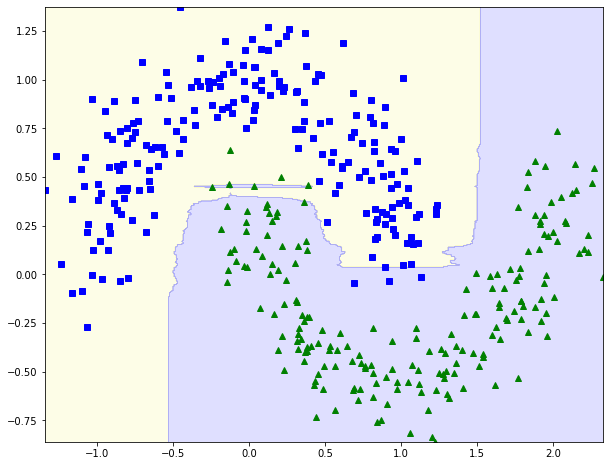

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
fig,ax = plt.subplots(1,1,figsize = (10,8))
x0range = np.linspace(min(X_train[:,0]),max(X_train[:,0]),500)
x1range = np.linspace(min(X_train[:,1]),max(X_train[:,1]),500)
x0mesh,x1mesh = np.meshgrid(x0range,x1range)
xvals = np.c_[x0mesh.ravel(),x1mesh.ravel()]
ypred = bag_clf.predict(xvals).reshape(x0mesh.shape)
ax.plot(X_train[:,0][y_train == 0],X_train[:,1][y_train==0],'bs')
ax.plot(X_train[:,0][y_train == 1],X_train[:,1][y_train==1],'g^')
col_scheme = ListedColormap(['#fafab0','#9898ff']) 
ax.contourf(x0mesh,x1mesh,ypred,alpha = 0.3,cmap = col_scheme)

Visualizing one Decision Tree

In [27]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

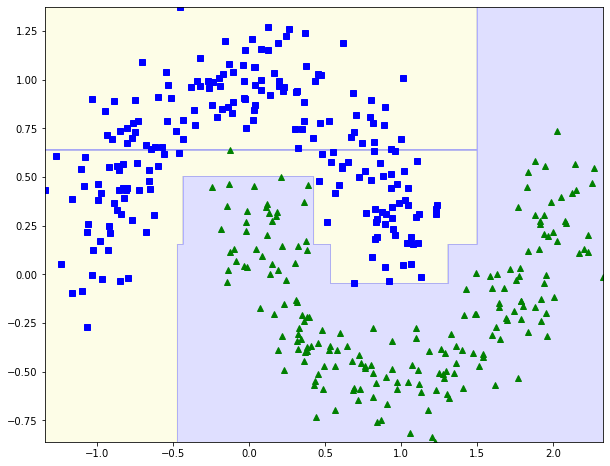

In [28]:
fig,ax = plt.subplots(1,1,figsize = (10,8))
x0range = np.linspace(min(X_train[:,0]),max(X_train[:,0]),500)
x1range = np.linspace(min(X_train[:,1]),max(X_train[:,1]),500)
x0mesh,x1mesh = np.meshgrid(x0range,x1range)
xvals = np.c_[x0mesh.ravel(),x1mesh.ravel()]
ypred = dtree.predict(xvals).reshape(x0mesh.shape)
ax.plot(X_train[:,0][y_train == 0],X_train[:,1][y_train==0],'bs')
ax.plot(X_train[:,0][y_train == 1],X_train[:,1][y_train==1],'g^')
col_scheme = ListedColormap(['#fafab0','#9898ff']) 
ax.contourf(x0mesh,x1mesh,ypred,alpha = 0.3,cmap = col_scheme)

The Bagging Classifier Results in a much smoother decision boundary as it is the result of "soft voting" from 500 different Decision Tree classifiers.

Notice that the ensemble is more generalized with comparable bias but less variance compared to the single decision tree. 

<h2>Out of Bag Evaluation</h2>

In Bagging some samples will be sampled several times, while others may not be sampled at all. 

By default, a Bagging Classifier samples **m** training instances with replacement (bootstrap = True). 

As **m** becomes larger, the ratio of instances that are not sampled reaches 37%. These are known as out of bag instances.

Since a predictor never sees the oob instances during training, it can be evaluated on the out of bag instances. 

In [29]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 500,
                           bootstrap = True, n_jobs = -1,oob_score = True)

In [30]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [31]:
bag_clf.oob_score_

0.9775

<h1> Random Patches and Random Subspaces </h1> 

We can also sample features as well. By using max_features and bootstrap_features, we can sample features. 

Sampling both features and training instances is called **Random Patches Method**. 

Using all the training instances and sampling features is **Random Subspaces**(bootstrap = False, max_samples=1.0)

<h1> Random Forests </h1>

Random Forests allow for sampling of features too where it samples a subset of fetures for each estimator. This results in a greater diversity in the estimators.

When growing a tree in a Random Forests, at each node, only a random subset of features are considered. Not all features are looked into for each node like in decision trees.

<h1> Extra Trees </h1>
It is also possible to make the threshold random too, rather than searching for the split within the subset of features which results in the highest information gain.

<h1> Feature Importance </h1>

Random Forests measure the average decrease in impurity on average across all trees in the forest. 

It takes the weighted average of the impurity decrease of each split relevant to that feature. Adds all these weighted decrease in purity and then divides it to scale by 1. 

<h2> Feature importance of pixels of MNIST </h2>

In [32]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',version=1)
mnist.target = mnist.target.astype(np.uint8)

In [33]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rnd_clf.fit(mnist["data"],mnist["target"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [36]:
import matplotlib as mpl
def plot_featureimportance(data):
    image = data.reshape(28,28)
    plt.imshow(image,cmap = mpl.cm.hot,interpolation = "nearest")
    plt.axis("off")

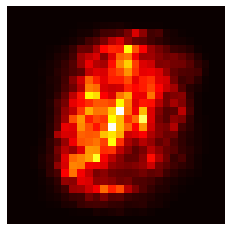

In [37]:
plot_featureimportance(rnd_clf.feature_importances_)

<h1>Boosting</h1>

Involves combining several weak learners into a strong learner

General idea is that it trains predictors sequentially, each trying to correct the mistakes of its predecessor.

- AdaBoost
- Gradient Boosting

<h1> AdaBoost </h1>

Here, the predictor tries to correct the instances that the predecessor underfitted. Hence the new predictors will focus more on the hard cases than the fitted cases. 

Once the first classifier is trained on the training instances, the relative weight of the misclassified training instances is increased. Then the second classifier is trained using updated weights. Again the misclassified training instances are increased in weight. This process is repeated.

Once all the predictors are trained, the ensemble makes predictions very much like bagging or pasting. But each predictor has different weights based on their overall accuracy on the weighted training set. 

The most suited algorithms to be used with AdaBoost are decision trees with one level as they are weak classifiers with just above random chance on a classification problem.

Each instance is assigned a weight of (1/m) = w. 

After the first predictor training, the error rate is calculated. 

error rate = (correct - N)/N.

the error rate is modified:

error = sum(w(i) * terror(i))/sum(w)

where w(i) is the weight of each instance, terror(i) is 1 if wrongly classified and 0 is correct. 

once prediction is done, the **stage weight** is calculated which is the weight for the predictor in the final decision making. 

stage = (learningrate) * ln((1-error)/error)

Higher the (1-error)/error, results in a higher stage weight. Lower error allows for this
this is used to update the weight of each instance

w = w * exp(stage * terror)

**Afterwards, all the instance weights are normalized. (w/sum(w))**

In making the predictions, it calculates the stage weight for all the predictors in each prediction class. Highest one is the prediction.

Now since the instances have been attached with updated weights, for the next predictor, we can multiply the training instances with the weight and increase their prominence in the dataset.

In [38]:
X,y = make_moons(n_samples = 500, noise = 0.15, random_state = 42)

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                             n_estimators = 200,
                            algorithm="SAMME.R",learning_rate = 0.5)

In [40]:
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [42]:
ada_clf.predict_proba(X_test)

array([[0.28621151, 0.71378849],
       [0.27779834, 0.72220166],
       [0.27779834, 0.72220166],
       [0.27691708, 0.72308292],
       [0.16630669, 0.83369331],
       [0.27416815, 0.72583185],
       [0.72986054, 0.27013946],
       [0.74360022, 0.25639978],
       [0.74012106, 0.25987894],
       [0.74360022, 0.25639978],
       [0.04137889, 0.95862111],
       [0.72986054, 0.27013946],
       [0.26011562, 0.73988438],
       [0.70202622, 0.29797378],
       [0.06261627, 0.93738373],
       [0.84941196, 0.15058804],
       [0.72986054, 0.27013946],
       [0.06261627, 0.93738373],
       [0.06261627, 0.93738373],
       [0.28132947, 0.71867053],
       [0.72986054, 0.27013946],
       [0.06589324, 0.93410676],
       [0.28621151, 0.71378849],
       [0.74012106, 0.25987894],
       [0.28132947, 0.71867053],
       [0.72775634, 0.27224366],
       [0.55100671, 0.44899329],
       [0.72986054, 0.27013946],
       [0.05853246, 0.94146754],
       [0.84941196, 0.15058804],
       [0.

In [45]:
np.bincount(y_test)

array([43, 57], dtype=int64)

In [46]:
set(y_test)

{0, 1}

In [47]:
for i in set(y_test):
    print(i,sum(y_test == i))

0 43
1 57


In [48]:
accuracy_score(y_test,ada_clf.predict(X_test))

0.95